In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
import seaborn as sns

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Check if there's `nan` and drop it.

In [48]:
train_data.isna().sum(), test_data.isna().sum()

(x    0
 y    1
 dtype: int64,
 x    0
 y    0
 dtype: int64)

In [51]:
train_data = train_data.dropna()

In [52]:
train_data.isna().sum()

x    0
y    0
dtype: int64

In [53]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [54]:
test_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


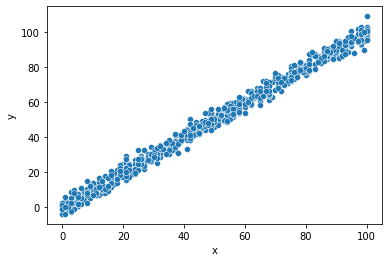

In [55]:
sns.scatterplot(data=train_data, x='x', y='y')
plt.show()

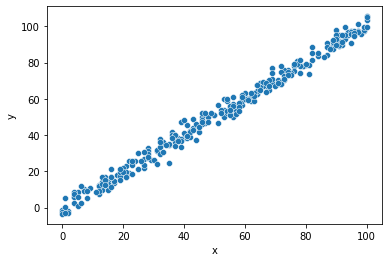

In [56]:
sns.scatterplot(data=test_data, x='x', y='y')
plt.show()

In [57]:
X_test = test_data['x'].values.astype('float32')
y_test = test_data['y'].values.astype('float32')


X_train = train_data['x'].values.astype('float32')
y_train = train_data['y'].values.astype('float32')

### Normalizing the Data

In [58]:
normalizer = keras.layers.experimental.preprocessing.Normalization(input_shape=[1, ])

In [59]:
normalizer.adapt(X_train)

### Model Creation

In [68]:
model = keras.Sequential([
    normalizer,
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 180
Trainable params: 177
Non-trainable params: 3
_________________________________________________________________


In [84]:
model.compile(
    optimizer= keras.optimizers.Adam(lr=0.01, clipvalue=1),
    loss = 'mean_absolute_error',
    metrics =["mse"]
)

In [85]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1, validation_split=.2)

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 2.4543 - mse: 9.2634 - val_loss: 2.3639 - val_mse: 9.1995
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 2.3102 - mse: 8.2381 - val_loss: 2.3717 - val_mse: 8.5319
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 2.2382 - mse: 7.7978 - val_loss: 2.3018 - val_mse: 8.1063
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 2.3494 - mse: 8.5941 - val_loss: 2.3844 - val_mse: 9.3471
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 2.3489 - mse: 8.3845 - val_loss: 2.6543 - val_mse: 11.1570
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 2.4128 - mse: 9.0888 - val_loss: 2.2962 - val_mse: 8.3646
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 2.4109 - mse: 8.9815 - val_loss: 2.3131 - val_mse: 8.3696
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 2.3084 - mse: 8.4

In [89]:
history.history

{'loss': [2.4437918663024902,
  2.2968995571136475,
  2.3566741943359375,
  2.4199984073638916,
  2.374041795730591,
  2.391059160232544,
  2.37872576713562,
  2.32831072807312,
  2.3472020626068115,
  2.3861045837402344],
 'mse': [9.034421920776367,
  8.365930557250977,
  8.705100059509277,
  9.186601638793945,
  8.830343246459961,
  9.03662109375,
  8.906161308288574,
  8.360666275024414,
  8.641154289245605,
  8.766496658325195],
 'val_loss': [2.363915205001831,
  2.371720790863037,
  2.3018457889556885,
  2.3843584060668945,
  2.6542513370513916,
  2.2962276935577393,
  2.3131470680236816,
  2.369716167449951,
  2.2919223308563232,
  2.2770473957061768],
 'val_mse': [9.199460983276367,
  8.531896591186523,
  8.10632038116455,
  9.347087860107422,
  11.156999588012695,
  8.364551544189453,
  8.369550704956055,
  9.278979301452637,
  8.092612266540527,
  8.010618209838867]}

### Visualising the Model History for every epoch

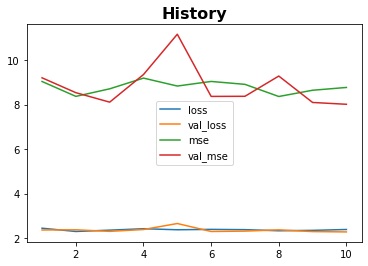

In [91]:
def plotHistory(history):
    x = np.array([i+1 for i in range(10)])
    
    plt.title("History", fontsize=16, fontweight='bold')
    plt.plot(x, history["loss"], label='loss')
    plt.plot(x, history["val_loss"], label='val_loss')
    
    plt.plot(x, history["mse"], label='mse')
    plt.plot(x, history["val_mse"], label='val_mse')
    
    plt.legend()
    plt.show()
plotHistory(history.history)

### Making predictions

In [112]:
predictions = model.predict(X_test[:30])

In [113]:
predictions.reshape(-1), y_test[:30]

(array([76.88457  , 21.265417 , 22.258615 , 20.272217 , 36.163406 ,
        15.306221 , 61.986584 , 94.76216  , 20.272217 ,  5.2783284,
         3.9662166, 19.279016 , 95.75534  , 61.986584 , 36.163406 ,
        15.306221 , 64.96618  , 14.313024 , 86.81656  , 68.93897  ,
        88.802956 , 51.06139  , 88.802956 , 27.224613 , 96.74854  ,
        58.013783 , 78.87096  , 21.265417 , 92.77576  , 27.224613 ],
       dtype=float32),
 array([79.775154, 23.177279, 25.609262, 17.857388, 41.849865,  9.805235,
        58.87466 , 97.617935, 18.395128,  8.746748,  2.811416, 17.095373,
        95.14907 , 61.38801 , 40.247017, 14.822486, 66.95807 , 16.63508 ,
        90.655136, 77.22983 , 92.119064, 46.913876, 89.82635 , 21.713804,
        97.41207 , 57.016315, 78.31056 , 19.13151 , 93.034836, 26.591124],
       dtype=float32))

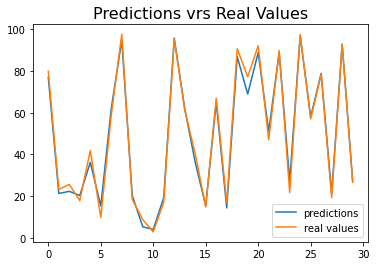

In [114]:
plt.plot(predictions.reshape(-1), label="predictions")
plt.plot(y_test[:30], label="real values")
plt.title("Predictions vrs Real Values", fontsize=16)
plt.legend()
plt.show()

> This model is accurate